# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

17 Campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [82]:
import pandas as pd

In [83]:
bankDF = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [84]:
bankDF.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [85]:
# Get the count for each class
bankDF["y"].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

Based on what the description for #11, duration, it seems wise to not use it in the predictive models.

In [86]:
# We look at the # of missing values in the df
bankDF.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Impressively enough, there is no missing values in the dataframe

We check the number of "unknown" in some of the categorical values (default, marital, housing, loan, job, education) since it's not great to have a prediction model be based on unknown data

In [87]:
bankDF["default"].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [88]:
bankDF["housing"].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [89]:
bankDF["loan"].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [90]:
bankDF["education"].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [91]:
bankDF["job"].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [92]:
bankDF["marital"].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [93]:
len( bankDF.query( "loan != 'unknown' & housing != 'unknown' & default != 'unknown' & job != 'unknown' & education != 'unknown' & marital != 'unknown'" ) )

30488

In [94]:
len( bankDF )

41188

We lose around 25% of the data if we remove the "unknown" values from the data. However, it seems like most of this comes from default, which has a significant imbalance between yes and no. Thus, it probably won't be of much use in the modeling, so we should remove it.

In [95]:
# Removing default from the query
filteredLen = len( bankDF.query( "loan != 'unknown' & housing != 'unknown' & job != 'unknown' & education != 'unknown' & marital != 'unknown'" ) )
filteredLen

38245

In [96]:
filteredLen / len( bankDF )

0.9285471496552394

By filtering out the unknowns in the categorical values, we only reduced the dataset by 7%, which is really decent. Thus, when preparing the data, we should drop any row that has "unknown" in the categorical variables to avoid training unknown data.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [97]:
bankDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Our business objective for this project is to create a classification model that can accurately predict whether a bank client has or has not subscribed to a term deposit. These predictions will be based on the features provided by the given dataset. In addition, we would like to identify features that have a strong impact on the model so that we can convey to the bank what features to focus on for their next mamrketing campaign.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [98]:
# For the features, as mentioned above, we want to drop the "default" and "duration" features.
filtered_columns = bankDF.drop( ["default", "duration"], axis = 1 )
filtered_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   contact         41188 non-null  object 
 7   month           41188 non-null  object 
 8   day_of_week     41188 non-null  object 
 9   campaign        41188 non-null  int64  
 10  pdays           41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

In [99]:
# In addition, as mentioned above, we want to drop all rows with "unknown" for the categorical columns
filtered_columns = filtered_columns.query( "loan != 'unknown' & housing != 'unknown' & job != 'unknown' & education != 'unknown' & marital != 'unknown'" )

In [100]:
# Now that we filtered the features and dropped unknown values, we separate the features and the target value
X, y = filtered_columns.drop( "y", axis = 1 ), filtered_columns["y"]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   day_of_week     38245 non-null  object 
 9   campaign        38245 non-null  int64  
 10  pdays           38245 non-null  int64  
 11  previous        38245 non-null  int64  
 12  poutcome        38245 non-null  object 
 13  emp.var.rate    38245 non-null  float64
 14  cons.price.idx  38245 non-null  float64
 15  cons.conf.idx   38245 non-null  float64
 16  euribor3m       38245 non-null  float64
 17  nr.employed     38245 non-null  floa

In [146]:
# We now need to encode the categorical features and scale the numerical features. We can do this using a column transformer.
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

transformer = make_column_transformer( 
    ( OneHotEncoder( drop = "if_binary", handle_unknown='ignore' ), make_column_selector( dtype_include=object ) ),
    remainder = StandardScaler() )

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [102]:
# We split the train-test data by 25-75
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y )

print( len(X_train), len(X_test), len(y_train), len(y_test) )

28683 9562 28683 9562


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [103]:
# The baseline model should just be a model that always returns "no"
# We use the Dummy Classifier to do this
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

baseline_model = DummyClassifier().fit( X_train, y_train )

baseline_trainScore = accuracy_score( y_train, baseline_model.predict( X_train ) )
baseline_testScore = accuracy_score( y_test, baseline_model.predict( X_test ) )                       

print( "Training Accuracy", baseline_trainScore )
print( "Testing Accuracy", baseline_testScore )

Training Accuracy 0.8881567478994526
Testing Accuracy 0.890190336749634


As we can see, we need a model that has 89% or above accuracy

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logRegPipe = Pipeline([
    ( "transform", transformer ),
    ( "logreg", LogisticRegression() )
]).fit( X_train, y_train )

C:\Users\Derek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We get a convergence warning since we need a higher max_iter

### Problem 9: Score the Model

What is the accuracy of your model?

In [105]:
print( "Training Accuracy", accuracy_score( y_train, logRegPipe.predict( X_train ) ) )
print( "Testing Accuracy", accuracy_score( y_test, logRegPipe.predict( X_test ) ) )

Training Accuracy 0.9011958302827459
Testing Accuracy 0.9004392386530015


As we can see, the logistic regression model is slightly more accurate than the baseline model.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [106]:
# To reduce redundant code, we'll create a method that records the training accuracy, testing accuracy, and train time
from time import process_time # code taken from https://stackoverflow.com/questions/74818246/how-to-calculate-running-time-for-a-scikit-learn-model

def trainAndScore( classifier ):
    
    pipe = Pipeline([
        ( "transform", transformer ),
        ( "classifier", classifier )
    ])
    
    start = process_time()
    pipe.fit( X_train, y_train )
    end = process_time()
    
    trainScore = accuracy_score( y_train, pipe.predict( X_train ) )
    testScore = accuracy_score( y_test, pipe.predict( X_test ) )
    time = end - start
    print( trainScore, testScore, time )
    
    return [trainScore, testScore, time]

In [107]:
# Import all the classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [108]:
# Train the logistic regression model
LogRegResults = trainAndScore( LogisticRegression() )

0.9011958302827459 0.9004392386530015 1.609375


C:\Users\Derek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
# Train the KNN model
KNNResults = trainAndScore( KNeighborsClassifier() )

0.9139908656695603 0.8897720142229659 0.625


In [110]:
# Train the decision tree model
TreeResults = trainAndScore( DecisionTreeClassifier() )

0.9956420179200223 0.8392595691277975 0.765625


In [111]:
# Train the SVC model
SVCResults = trainAndScore( SVC() )

0.9059024509291218 0.9023216900230078 38.734375


In [112]:
# Create the Dataframe to contain our results
results_df = pd.DataFrame( {"model":["KNN","Logistic Regression", "SVC", "Decision Tree"], 
                            "Train Score":[KNNResults[0], LogRegResults[0], SVCResults[0], TreeResults[0]],
                         "Test Score":[KNNResults[1], LogRegResults[1], SVCResults[1], TreeResults[1]], 
                            "Fit Time":[KNNResults[2], LogRegResults[2], SVCResults[2], TreeResults[2]]})

In [113]:
results_df

,model,Train Score,Test Score,Fit Time
0,KNN,0.913991,0.889772,0.625000
1,Logistic Regression,0.901196,0.900439,1.609375
2,SVC,0.905902,0.902322,38.734375
3,Decision Tree,0.995642,0.839260,0.765625


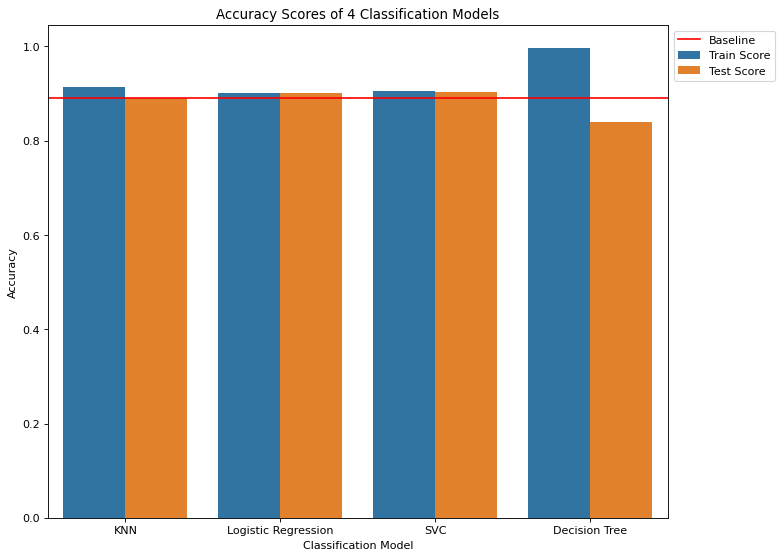

In [114]:
# Plot the accuracy scores for more clarity
import seaborn as sns
import matplotlib.pyplot as plt

tidy = results_df.melt( id_vars="model", value_vars=["Train Score", "Test Score"]).rename(columns=str.title)
# print( tidy)
plt.figure( figsize=(10, 8), dpi=80 )
graph = sns.barplot( tidy, x = "Model", y = "Value", hue = "Variable" )
graph.axhline( baseline_testScore, color = "r", label = "Baseline" )

plt.legend(bbox_to_anchor=(1, 1) )
plt.title( "Accuracy Scores of 4 Classification Models" )
plt.xlabel( "Classification Model" )
plt.ylabel( "Accuracy" )
plt.savefig( "images/baseModels.png", bbox_inches='tight' )

As we can see, Logistic Regression and SVC had similar performances with SVC taking a really long time to fit the data. KNN is right at the baseline while the decision tree model did significantly worse than the baseline. However, overall, none of the models performed really well above the baseline.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Adjust Performance Metric

For the performance metric, we should be utilizing recall instead of accuracy to focus on identifying as many clients that will subscribe to a term deposit as possible. This is because the bank promotions are designed to aim at this demographic. So the more potential clients we can identify with this model, the more successful a future promotion could be. 

In addition, using accuracy can be really misleading because a majority of the data is "no", which is why our baseline model had such high accuracy. However, if we were to use recall as the performance metric, the baseline model would have a score of 0 since it would fail to identify any clients willing to subscribe.

In [115]:
# See what the recall is for the previous basic models
from sklearn.metrics import recall_score

def getScore( classifier ):
    pipe = Pipeline([
        ( "transformer", transformer ),
        ( "classifier", classifier )
    ])
    pipe.fit( X_train, y_train )
    print( recall_score( y_test, pipe.predict( X_test ), pos_label = "yes" ) )
    
getScore( DummyClassifier() )
getScore( LogisticRegression() )
getScore( KNeighborsClassifier() )
getScore( DecisionTreeClassifier() )
getScore( SVC() )

0.0


C:\Users\Derek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.23142857142857143
0.2695238095238095
0.31523809523809526
0.22380952380952382


### Feature Engineering and Exploring

For features, we already did a bit of cleaning and engineering when we were first given the data. In addition, the gender feature wasn't even part of the original dataset funnily enough. But if it was, it might be worth keeping gender in case we discover a demographic featuring a specific gender that has a liklier chance of subscribing.

In [116]:
# Looking through each column to see any useless features we can just remove
# Commmented out to not have too much code output
# for c in X.columns:
#     print( X[c].value_counts() )

print( X["pdays"].value_counts() )

pdays
999    36879
3        393
6        379
4        106
2         57
9         55
12        53
7         52
5         45
10        44
13        33
11        26
1         24
15        22
14        18
0         15
8         14
16         8
17         6
18         5
22         3
19         3
21         2
25         1
26         1
27         1
Name: count, dtype: int64


It seems like for the most part, there isn't any categorical feature that is significantly underrepresented. For numerical features, most of them seem decent. One numerical feature that sticks out like a sore thumb is "pdays", with a majority of entries being at 999 days and minority all being below 30. If we scale the data, it seems like the values simply become binary, with 0 being not contacted and 1 being contacted. Thus, it might be more beneficial to change "pdays" into a categorical variable of whether the client was contacted before or not rather than have it as numerical.

In [194]:
# Create a new column "contacted" to replace pdays for the training and testing set
import numpy as np

X_train["contacted"] = np.where( X_train["pdays"] < 999, "yes", "no" )
X_train = X_train.drop( "pdays", axis = 1 )
X_train["contacted"].value_counts()

X_test["contacted"] = np.where( X_test["pdays"] < 999, "yes", "no" )
X_test = X_test.drop( "pdays", axis = 1 )
X_test["contacted"].value_counts()

contacted
no     9924
yes     373
Name: count, dtype: int64

### Hyperparameter Tuning and Grid Search

Lastly, we can improve our models by utilizing GridSearchCV and hyperparameters to tune our models.

In [119]:
# We recreate the trainAndScore(). But this time, we introduce GridSearch and hyperparameters to find the best model.
# We also use recall too rather than accuracy

from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer

custom_scorer = make_scorer(recall_score, pos_label="yes" )

def searchTrainAndScore( classifier, param_grid ):
    
    pipe = Pipeline([
        ( "transform", transformer ),
        ( "classifier", classifier )
    ])
    
    grid = GridSearchCV( pipe, param_grid, scoring = custom_scorer )
    grid.fit( X_train, y_train )
    
    trainScore = grid.score( X_train, y_train )
    testScore = grid.score( X_test, y_test )
    
    # Since GridSearchCV has a mean_fit_time, we can use it rather than timing it ourselves
    time = np.mean( grid.cv_results_["mean_fit_time"] )
    print( trainScore, testScore, time )
    
    return [trainScore, testScore, time, grid]

In [120]:
# Logistic Regression
# For the param grid, we test out different solvers and hyperparameters
# We also set max_iter to 1000 so it can fit better

logreg_param_grid = { "classifier__solver": ["liblinear","lbfgs"], 
              "classifier__C": np.linspace(0.1, 5, 5), 
              "classifier__tol": np.linspace(0.00001,0.001, 5), 
              "classifier__max_iter": [1000]}

logreg_gridresults = searchTrainAndScore( LogisticRegression(), logreg_param_grid )

0.23659600997506233 0.23238095238095238 0.19707377719879152


In [121]:
# K Nearest Neighbors
# For the param grid, we change the # of neighbors and how neighbors are weighted

KNN_param_grid = { "classifier__n_neighbors": [i for i in range( 1, 12, 2 )], "classifier__weights": ["uniform", "distance"]}

knn_gridresults = searchTrainAndScore( KNeighborsClassifier(), KNN_param_grid )

0.9819201995012469 0.30952380952380953 0.06937191486358642


In [122]:
# Decision Tree
# For the param grid, we change the hyperparameters that decide on splits

tree_param_grid = {"classifier__min_impurity_decrease":[0, 0.01,0.05,0.1,0.5], 
                   "classifier__max_depth":[2,5,10,20,None],
                   "classifier__min_samples_split":[2,4,5],
                    "classifier__criterion":["gini","entropy"] }

tree_gridresults = searchTrainAndScore( DecisionTreeClassifier(), tree_param_grid )

0.962281795511222 0.32095238095238093 0.1201311124165853


In [163]:
# SVC
# For SVC, training already takes a really long time, so we can only do a small grid search
svc_param_grid = {"classifier__kernel": ["rbf","poly","sigmoid"]}

svc_gridresults = searchTrainAndScore( SVC(), svc_param_grid )

0.2328332371609925 0.24616695059625213 16.021579774220783


In [164]:
# Create the Dataframe to contain our results
grid_results_df = pd.DataFrame( {"model":["KNN","Logistic Regression", "SVC", "Decision Tree"], 
                                 "Train Score":[knn_gridresults[0], logreg_gridresults[0], svc_gridresults[0], tree_gridresults[0]],
                                 "Test Score":[knn_gridresults[1], logreg_gridresults[1], svc_gridresults[1], tree_gridresults[1]], 
                                 "Fit Time":[knn_gridresults[2], logreg_gridresults[2], svc_gridresults[2], tree_gridresults[2]]})

In [165]:
grid_results_df

,model,Train Score,Test Score,Fit Time
0,KNN,0.981920,0.309524,0.069372
1,Logistic Regression,0.236596,0.232381,0.197074
2,SVC,0.232833,0.246167,16.021580
3,Decision Tree,0.962282,0.320952,0.120131


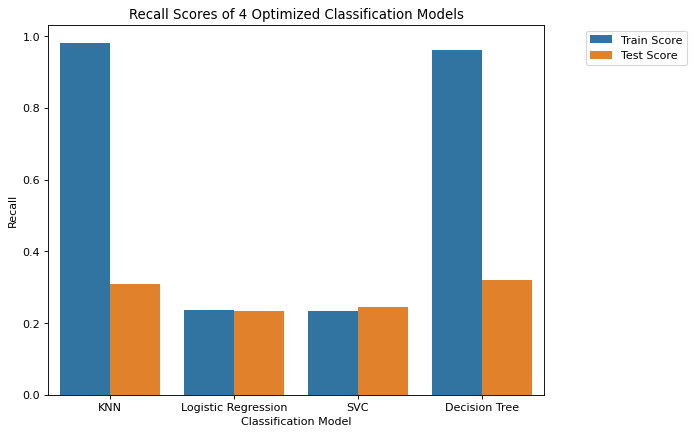

In [166]:
# Plot the accuracy scores for more clarity
tidy = grid_results_df.melt( id_vars="model", value_vars=["Train Score", "Test Score"]).rename(columns=str.title)
plt.figure( figsize=(8, 6), dpi=80 )
sns.barplot( tidy, x = "Model", y = "Value", hue = "Variable" )

plt.legend(bbox_to_anchor=(1.3, 1) )
#
plt.title( "Recall Scores of 4 Optimized Classification Models" )
plt.xlabel( "Classification Model" )
plt.ylabel( "Recall" )
plt.savefig( "images/optimalModels.png", bbox_inches='tight' )

From the results, we can see that the Decision Tree model and the KNN model performed the best with a recall score of around 0.3. Now that we have the two best models, we can try to analyze the models to see what the most impactful features are.

For KNN, we simply find the nearest neighbors. Thus, we can't interpret it to find any features.

For the decision tree, we can analyze the branches that were created and identify which features were compared first. These were the ones that separated the classes the most.

In [167]:
# Get the best decision Tree
best_tree = tree_gridresults[-1].best_estimator_.named_steps["classifier"]

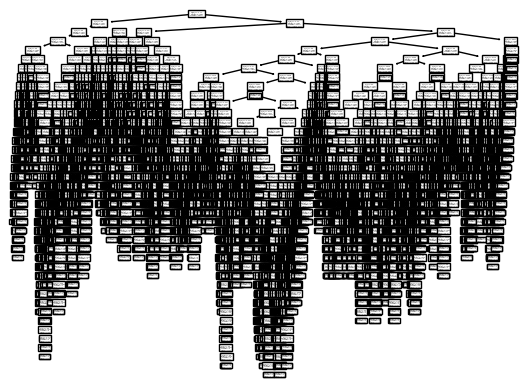

In [168]:
from sklearn.tree import plot_tree
plot = plot_tree( best_tree )

Interestingly, the best decision tree is one that is extremely overfitted. This could indicate that there isn't any concrete splits that divide the classes well. This would also imply that currently there isn't any features that determine if a client subscribes are not very impactful.

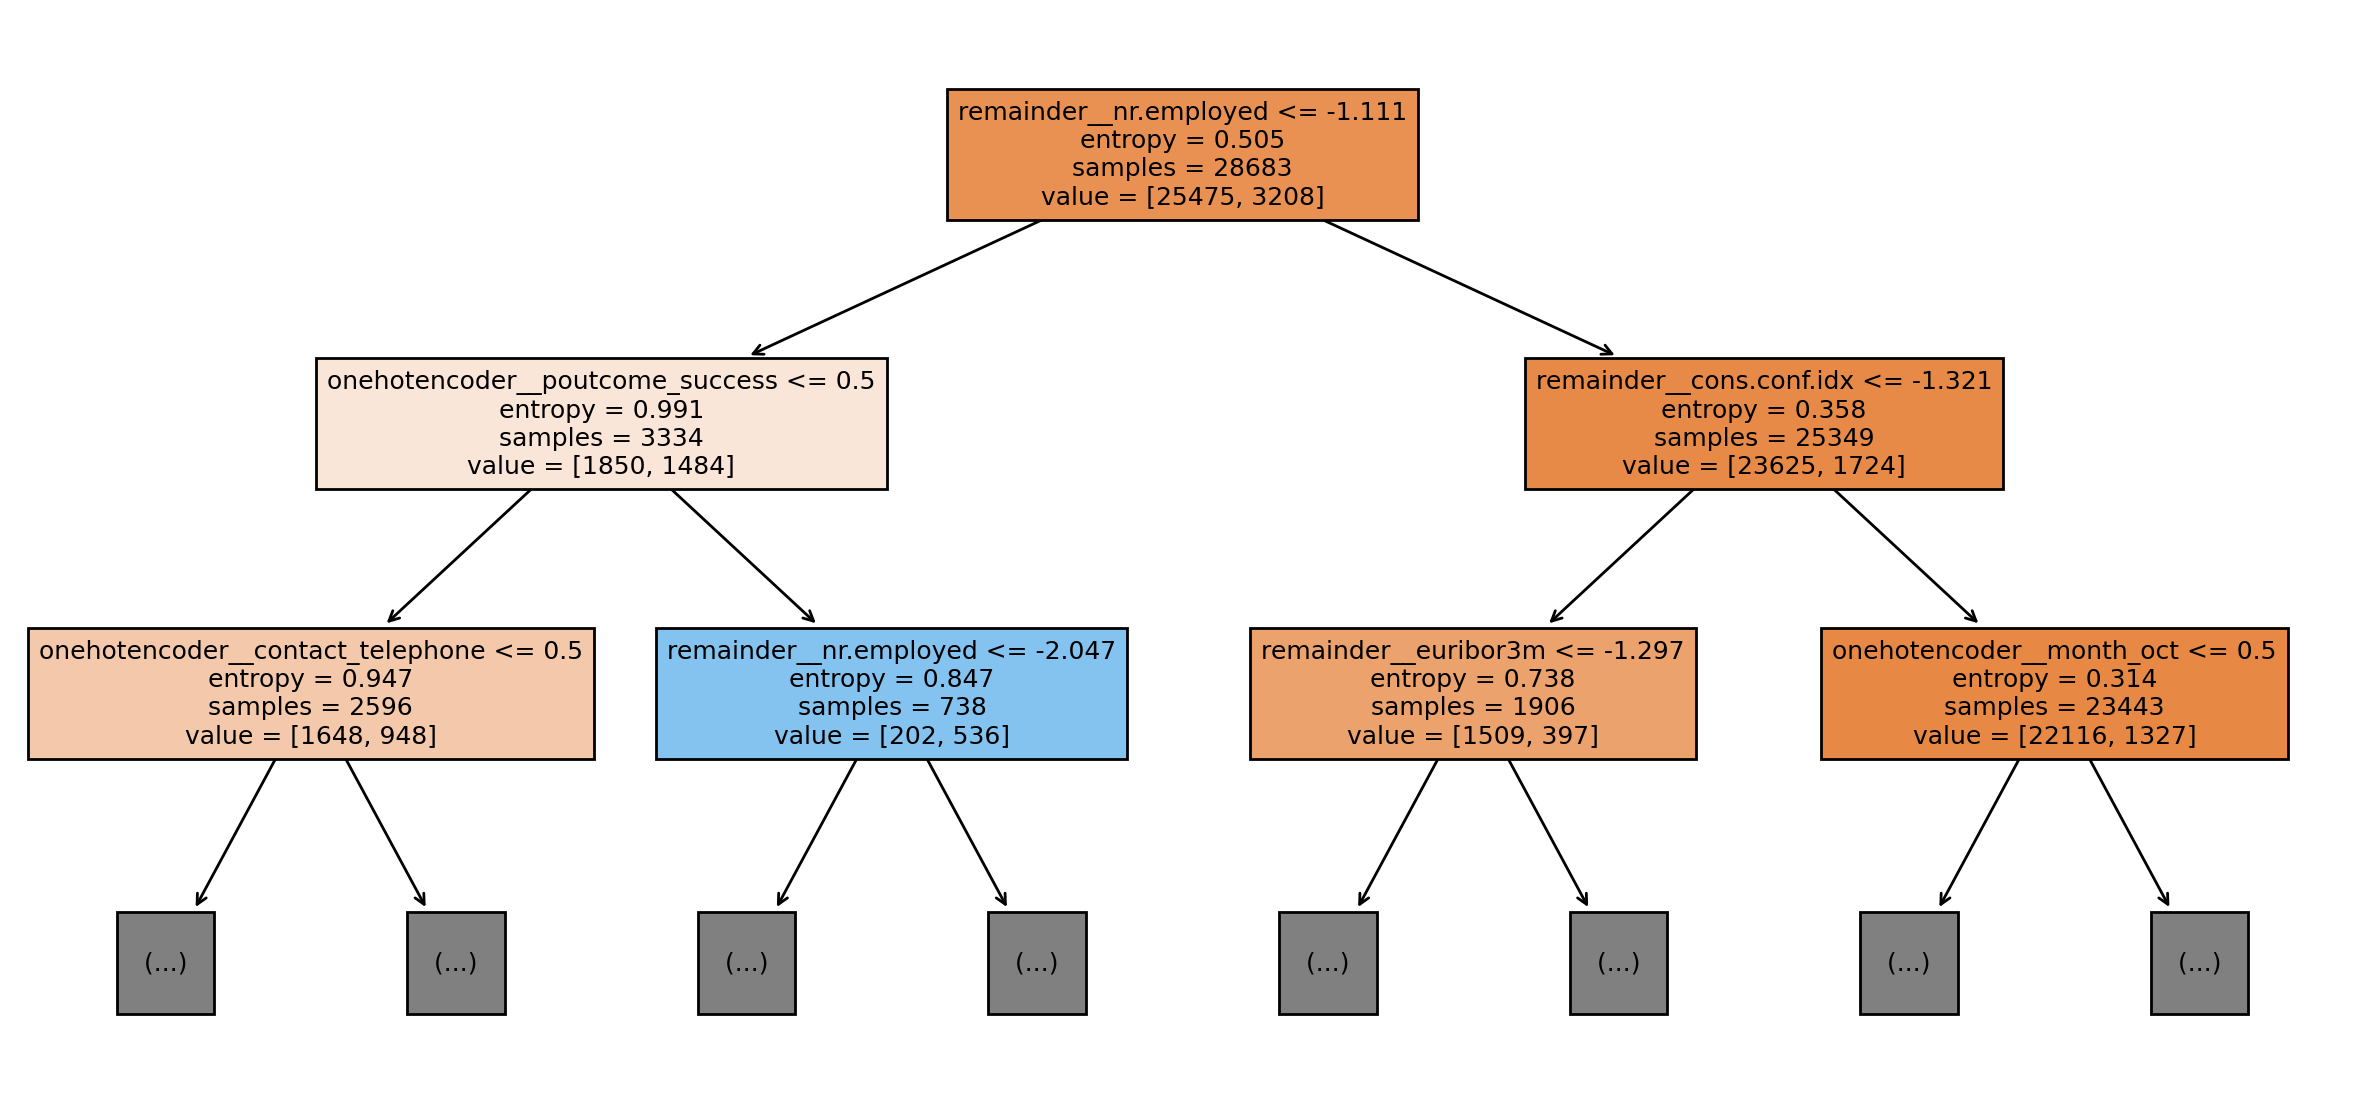

In [214]:
plt.figure( figsize=(15, 7), dpi=200 )
plot = plot_tree( best_tree, max_depth = 2, fontsize = 9, filled = True, feature_names = list( tree_gridresults[-1].best_estimator_.named_steps["transform"].get_feature_names_out() ) )

Perhaps another reason is that we removed some part of the dataset that was crucial or helpful in separating the classes. Thus, it might be better to just not engineer/clean/manipulate the features and try utilizing the full dataset.

### Utilizing the entire dataset

We use the original bank dataset without any manipulation to see how the results change.

In [170]:
# We save the original train-test set if we need it
og_X_train, og_X_test, og_y_train, og_y_test = X_train, X_test, y_train, y_test

# We need to split the data again
X, y = bankDF.drop( "y", axis = 1 ), bankDF["y"]
X_train, X_test, y_train, y_test = train_test_split( X, y )

In [171]:
all_logreg_gridresults = searchTrainAndScore( LogisticRegression(), logreg_param_grid )

0.4250649725671383 0.44519966015293116 0.28604211235046384


In [172]:
all_knn_gridresults = searchTrainAndScore( KNeighborsClassifier(), KNN_param_grid )

1.0 0.44519966015293116 0.07631683746973673


In [173]:
all_svc_gridresults = searchTrainAndScore( SVC(), svc_param_grid )

0.4678024833958995 0.42480883602378927 5.887000052134195


In [174]:
all_tree_gridresults = searchTrainAndScore( DecisionTreeClassifier(), tree_param_grid )

0.5137164308403118 0.4868309260832625 0.09581116104125977


In [175]:
# Create the Dataframe to contain our results
all_grid_results_df = pd.DataFrame( {"model":["KNN","Logistic Regression", "SVC", "Decision Tree"], 
                                 "Train Score":[all_knn_gridresults[0], all_logreg_gridresults[0], all_svc_gridresults[0], all_tree_gridresults[0]],
                                 "Test Score":[all_knn_gridresults[1], all_logreg_gridresults[1], all_svc_gridresults[1], all_tree_gridresults[1]], 
                                 "Fit Time":[all_knn_gridresults[2], all_logreg_gridresults[2], all_svc_gridresults[2], all_tree_gridresults[2]]})

In [176]:
all_grid_results_df

,model,Train Score,Test Score,Fit Time
0,KNN,1.000000,0.445200,0.076317
1,Logistic Regression,0.425065,0.445200,0.286042
2,SVC,0.467802,0.424809,5.887000
3,Decision Tree,0.513716,0.486831,0.095811


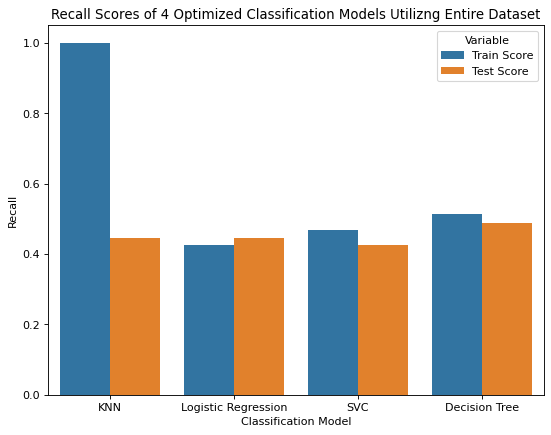

In [177]:
# Plot the accuracy scores for more clarity
tidy = all_grid_results_df.melt( id_vars="model", value_vars=["Train Score", "Test Score"]).rename(columns=str.title)
plt.figure( figsize=(8, 6), dpi=80 )
sns.barplot( tidy, x = "Model", y = "Value", hue = "Variable" )

plt.title( "Recall Scores of 4 Optimized Classification Models Utilizng Entire Dataset" )
plt.xlabel( "Classification Model" )
plt.ylabel( "Recall" )
plt.savefig( "images/alldataModels.png", bbox_inches='tight' )

Surprisingly, the models are performed twice as well when we utilize the entire dataset. It still seems like the decision tree model is the best model so far, so lets analyze it to see any features that stood out:

In [178]:
best_all_tree_estimator = all_tree_gridresults[-1].best_estimator_.named_steps["classifier"]

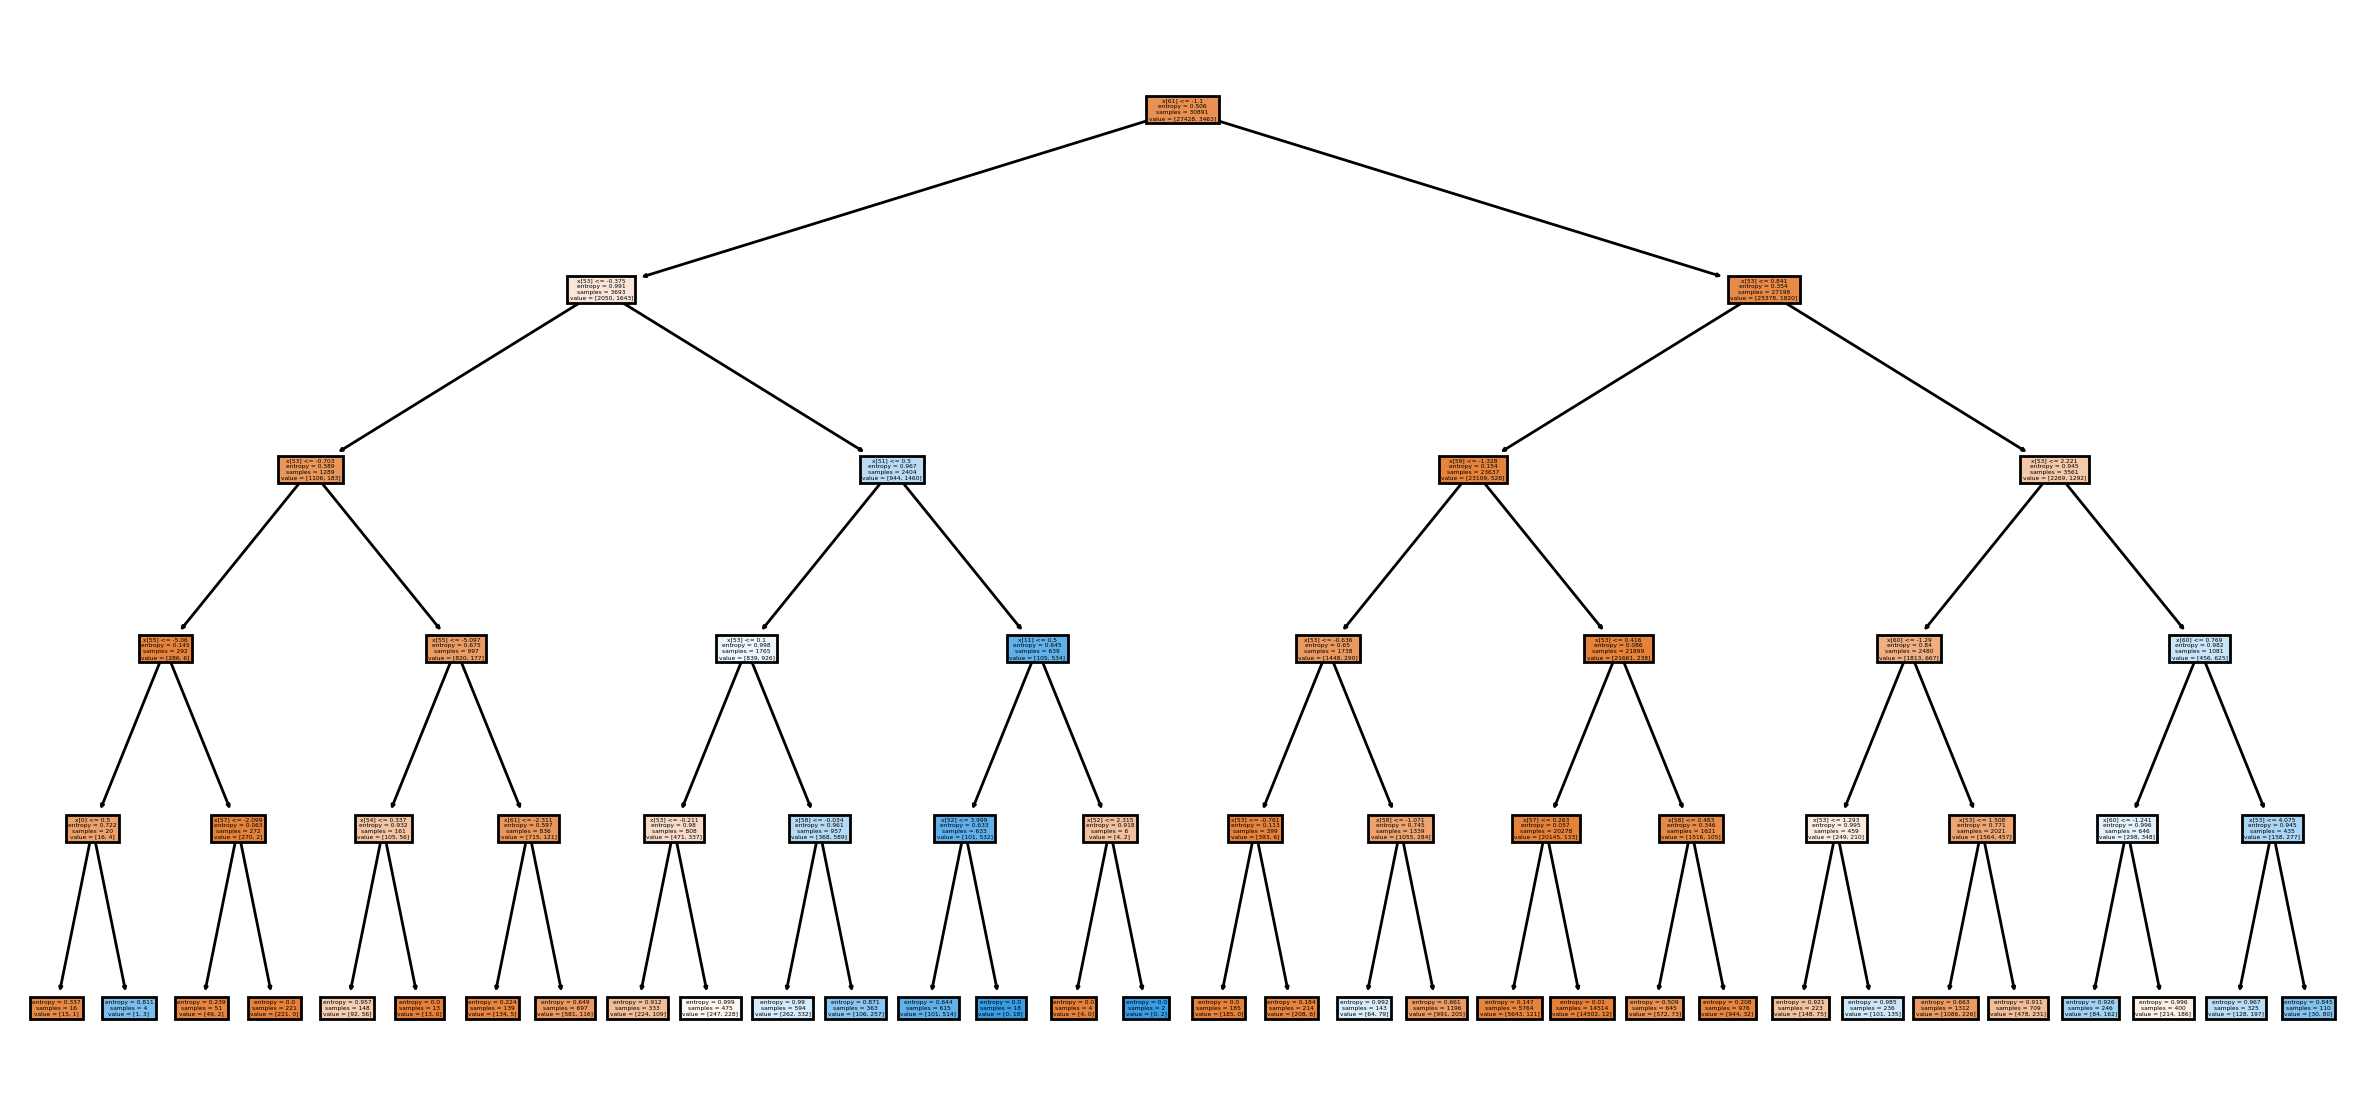

In [212]:
plt.figure( figsize=(15, 7), dpi=200 )
all_tree = plot_tree( best_all_tree_estimator, filled = True )

Although similar to the previous tree, this one seems a lot less deep, which means it's less overfitted.

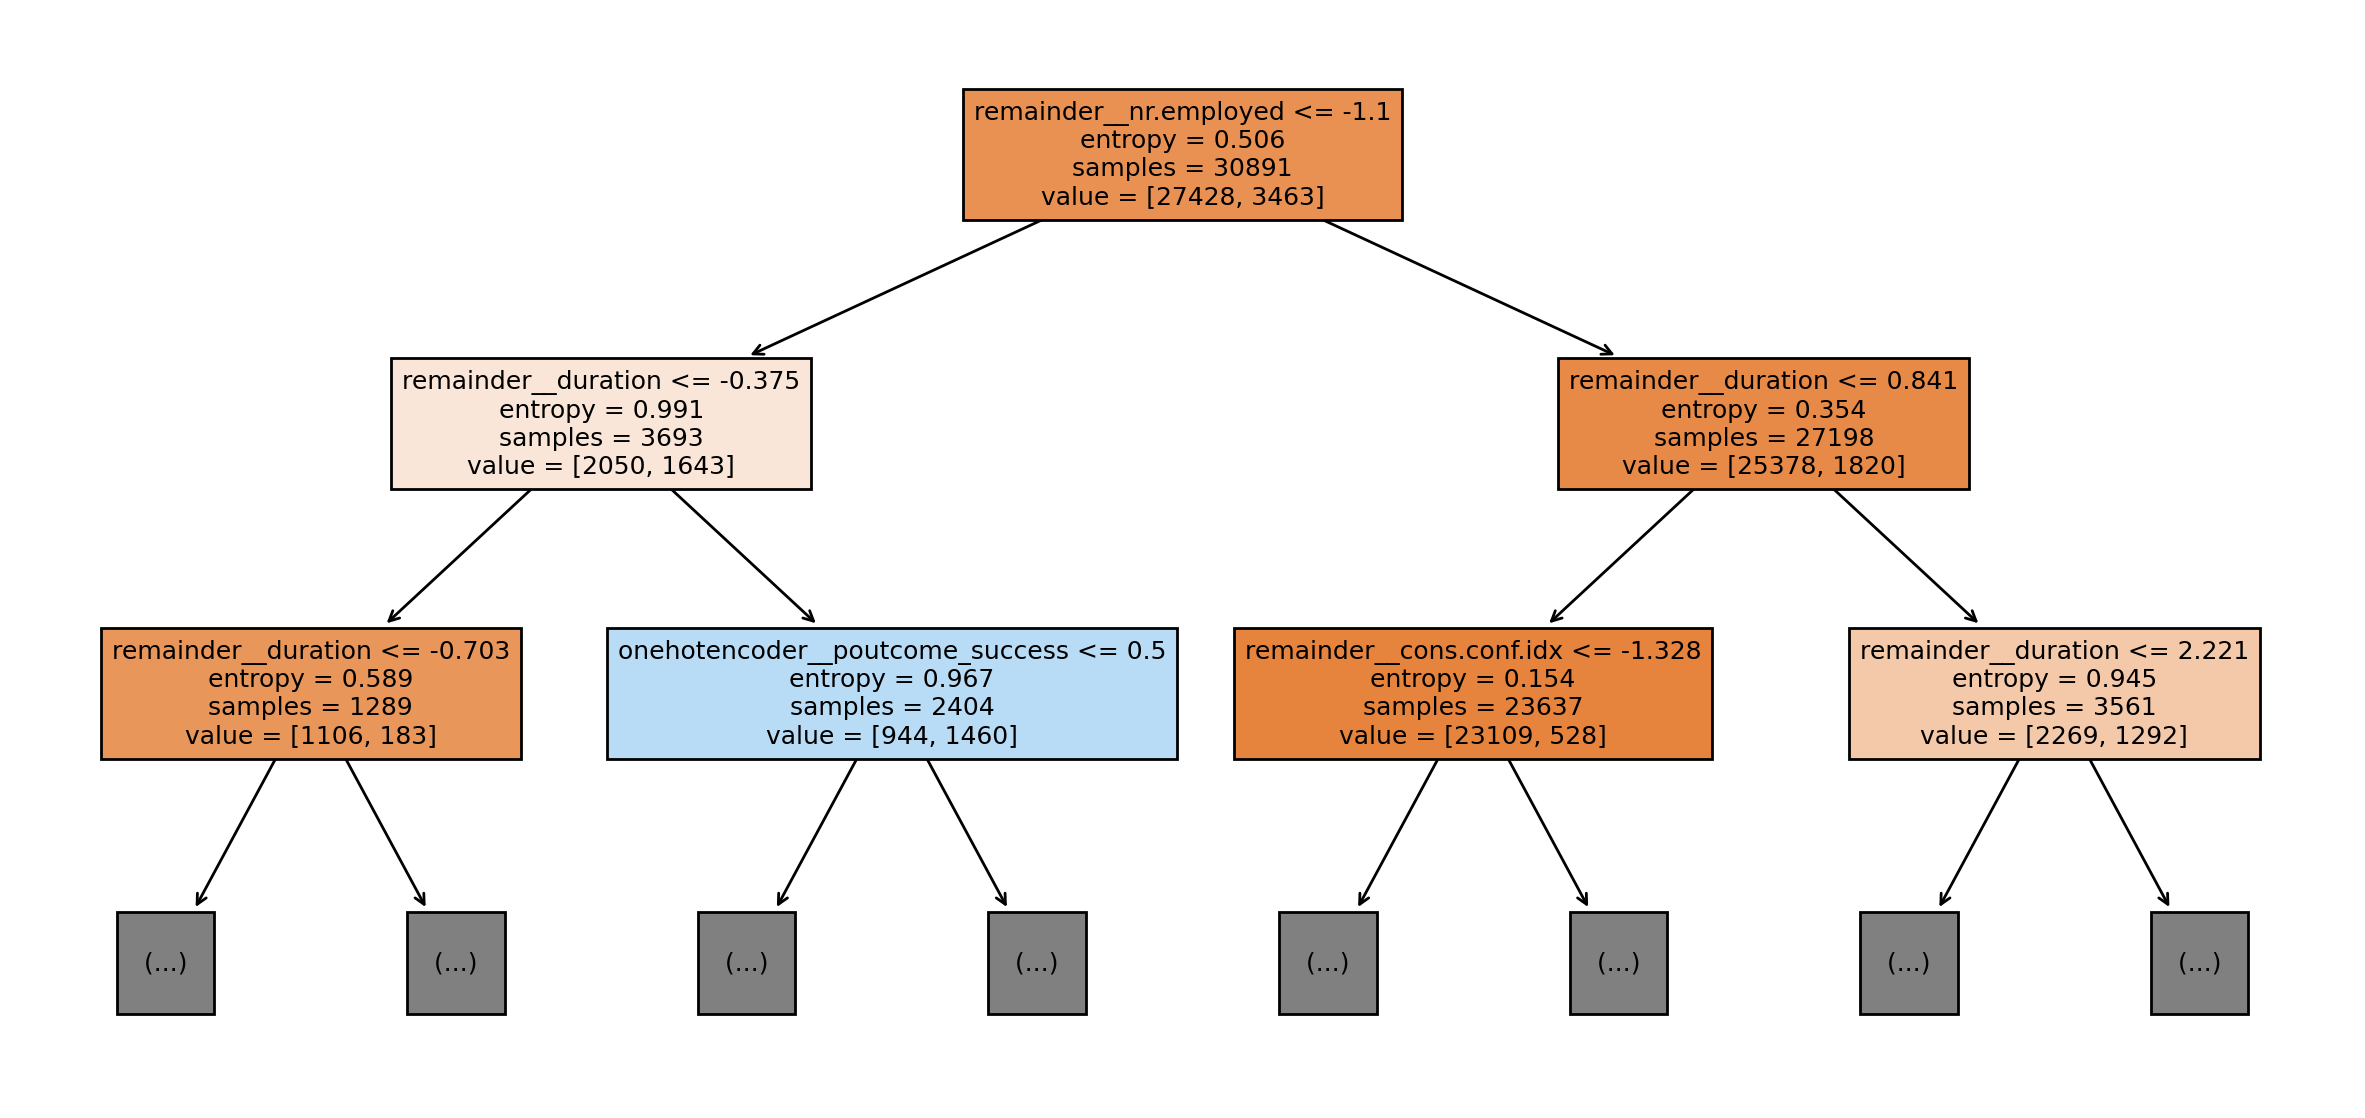

In [211]:
plt.figure( figsize=(15, 7), dpi=200 )
all_tree = plot_tree( best_all_tree_estimator, fontsize = 9, max_depth = 2, filled = True, feature_names = list( all_tree_gridresults[-1].best_estimator_.named_steps["transform"].get_feature_names_out() ) )

Looking at the variables used for each split, we can see that the "duration" feature is very prevalent in the first few splits. This makes sense, since a longer duration would imply a higher likely chance of having a client subscribe. However, as mentioned in the data analysis, "duration" should not be an input for a predictive model since it can't be predicted before communicating with the client. However, it is a definite conclusion that "duration" has a significant impact on the model. Perhaps having better sales pitchers for the promotion would help increase the duration of calls?

### Utilizing all of the dataset (except for duration)

Although the models above can't be used, it raises a questeion on if "duration" was removed from the dataset, would the models still perform as well?

In [181]:
# We need to split the data again
X, y = bankDF.drop( ["y", "duration"], axis = 1 ), bankDF["y"]
X_train, X_test, y_train, y_test = train_test_split( X, y )

In [182]:
no_duration_logreg_gridresults = searchTrainAndScore( LogisticRegression(), logreg_param_grid )

0.2286788089043076 0.2277730736663844 0.2822855005264282


In [183]:
no_duration_knn_gridresults = searchTrainAndScore( KNeighborsClassifier(), KNN_param_grid )

0.9780283318878289 0.331922099915326 0.07686724662780763


In [184]:
no_duration_svc_gridresults = searchTrainAndScore( SVC(), svc_param_grid )

0.23561723041341429 0.23793395427603725 15.910372638702393


In [185]:
no_duration_tree_gridresults = searchTrainAndScore( DecisionTreeClassifier(), tree_param_grid )

0.9609713790112749 0.3454699407281964 0.09556363773345948


In [186]:
# Create the Dataframe to contain our results
no_duration_grid_results_df = pd.DataFrame( {"model":["KNN","Logistic Regression", "SVC", "Decision Tree"], 
                                 "Train Score":[no_duration_knn_gridresults[0], no_duration_logreg_gridresults[0], no_duration_svc_gridresults[0], no_duration_tree_gridresults[0]],
                                 "Test Score":[no_duration_knn_gridresults[1], no_duration_logreg_gridresults[1], no_duration_svc_gridresults[1], no_duration_tree_gridresults[1]], 
                                 "Fit Time":[no_duration_knn_gridresults[2], no_duration_logreg_gridresults[2], no_duration_svc_gridresults[2], no_duration_tree_gridresults[2]]})

In [187]:
no_duration_grid_results_df

,model,Train Score,Test Score,Fit Time
0,KNN,0.978028,0.331922,0.076867
1,Logistic Regression,0.228679,0.227773,0.282286
2,SVC,0.235617,0.237934,15.910373
3,Decision Tree,0.960971,0.345470,0.095564


Unfortunately, as we can see, once we remove the "duration" feature from the dataset, the performance of the models drops significantly and is similar to our previously optimized models. Thus, we can say that besides the "duration" feature, the other features don't have a strong determinating factor in separating the two classes.

### Analyzing the KNN

Since the Decision Tree model is severely overfitted, we should check to see if the KNN is also overfitted to help assert the fact that these two models perform well just by overfitting.

In [188]:
knn_gridresults[-1].best_params_

{'classifier__n_neighbors': 1, 'classifier__weights': 'uniform'}

Yep, as we can see, the best hyperparameter for n_neighbors was 1, which meant the KNN model was mapping to the closest point in the training data. Interestingly, the recall/acccuracy of the model is not 1, which implies that there are some identical data points that have different classes. From this, we can confirm that both the Decision Tree and KNN models are overfitting.

### Analyzing the SVC

Although the Decision Tree and KNN models perform the best, they are overfitted to the training data and don't provide much insight to take from. Thus, it might be better to analyze the SVC to see which features were impactful in determining the class.

In [189]:
# Get the best parameters
svc_gridresults[-1].best_params_

{'classifier__kernel': 'sigmoid'}

In [195]:
# Get the permutations
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance( svc_gridresults[-1].best_estimator_, og_X_test, og_y_test, scoring = custom_scorer )

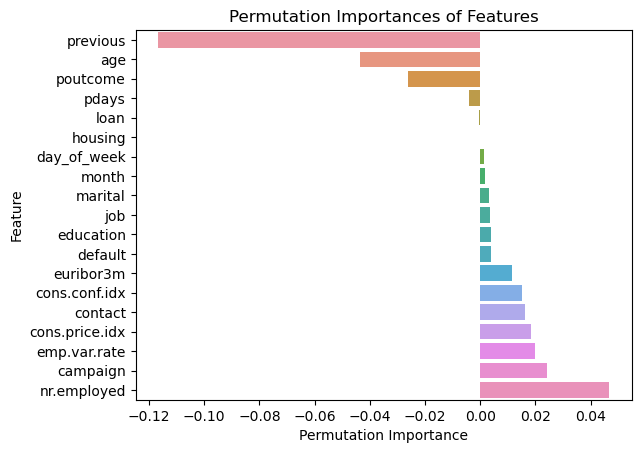

In [197]:
# Print out the permutation Importances
features = np.array( og_X_test.columns )
sorted_idx = perm_importance.importances_mean.argsort()

sns.barplot( y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx], orient = "h" )
plt.xlabel("Permutation Importance")
plt.ylabel( "Feature" )
plt.title( "Permutation Importances of Features" )
plt.savefig( "images/permutation.png", bbox_inches='tight' )

From the permutation importances, we can see that all of the features have less than 0.05 in permutation importance, meaning they all have very little impact on the model. In fact, many of the importances are negative, meaning that random chance caused the predictions to be more accurate. All of this supports the fact that there isn't any strong feature indicator to determine if a client will subscribe or not.

# Results

From our models, we can confirm that a decision tree is the best model to classify if a client will or will not subscribe to a term deposit. However, the model is extremely overfitted, resulting in high recall for the training data and low recall for the testing data. This is probably due to a lack of strong features that correlate to one class or the other. Thus, the best tree model is overfitted and somewhat matches with the test data. This is supported by the fact that the K-Nearest Neighbors model is the second best model, trailing behind the decision tree by a small amount. Both simply fit the training data and used it. Models such as Logistic Regression and SVC, which try to discover the decision boundary between the two classes, did poorly since there was no strong boundary.

Although our models are not very acccurate in terms of recall, we still obtained some good insight on the data. One thing is that the "duration" feature strongly impacts the models and is a good determining factor on whether a client will or will not subscribe. It clearly increases the performance of every model by a significant amount when included. However, "duration" is not something you can predict since it can only be recorded during communication with the client. But, it makes sense that if communication with the client is longer, there is a higher chance for them to subscribe. Thus, it might be worth investing more in promotion sales people to effectively raise the chances of having longer conversations with clients.

Another thing to note is that for each decision tree, the "nr.employed" feature is always the first feature used to split the data. This probably implies that out of the features, the number of employed employees in the company is a strong factor in the model for dividing the data into the two classes. This could be because the more employees there are, the more likely chance of the promotion team to have more personnel, which would lead to a higher frequency of communication with clients. As a result, there are more chances for there to be clients willing subscribe. Thus, if the bank wishes to improve their promotional campaign, perhaps they can invest more manpower into the campaign.

Ultimately, it seems like the currently provided features can not accurately predict whether a client will or will not subscribe to a term deposit. With our best model having a recall of 0.34, it might be difficult to glean any use from it. However, we can use this information to pivot our investigation to exploring new features that could lead to better predictions.

# Summary

With a dataset of marketing campaigns from a Portugeuse banking institution, we tried training different classification models to predict whether a client would subscribe to a term deposit. From our investigation, we discovered that none of the features in the dataset had a strong correlation with identifying clients. The only exception was the duration of the call with clients, which cannot be part of the prediction because it can only be recorded during the call, not before. Thus, perhaps the bank should invest more in other aspects of the promotional campaign rather than identifying clients such as manpower and promotional quality.

# Next Steps/Recommendations

From our results, we have seen that it's difficult to identify potential clients willing to subscribe to a term deposit. There are no strong determining factor and our best models don't perform very well. Thus, instead of identifying clients, the bank should instead focus on their marketing campaign to attract more clients. This way, they will have a higher chance of discovering clients that will subscribe. Perhaps they could invest in better sales persons or give more manpower to the team.

As for the next steps for this project, we will need to recontexualize the problem and collect new data that could help classify clients more accurately.

For example, from our investigation, we discovered that call duration was the only feature that had a significant impact on our classification models. Thus, we could find features that relate to the calls themselves such as call time or quality of call, and add them into the next dataset. This way, we're focusing on how to promote to clients rather than finding which clients to promote to.

If we wish to stay with identifying potential clients, then we would probably need to find more features to record and utilize. Perhaps having more client information such as income, debt, and housing might help contribute to the model.

# Reflection

Although I believe I did a thorough investigation in this project, I believe I could have organized it better. For example, perhaps I could have utilized the full dataset for training to get a better understanding before engineering the features. In addition, I believe I could improve on the hyperparameter grid searches by adding more parameters. However, I feel like I've already done such an exhaustive search that perhaps there might not be much impact. Lastly, I think I should have separated the different groups of models better by creating individual training methods and data splits for each group.